# 1.1 이 장의 주요 개념
- 1.2 컨테이너 타입
- 1.3 합성합수
- 1.4 미분

### 1.2 컨테이너 타입

In [1]:
import numpy as np
import torch

In [2]:
x = np.array([5,7,9])
y = x # x 특정 요소 바꾸면 y도 같이 바뀜 --> .copy() 함수 활용
print(x)
print(y)


x[1] = -1
print(x)
print(y)

[5 7 9]
[5 7 9]
[ 5 -1  9]
[ 5 -1  9]


In [3]:
x1 = torch.ones(5) # 1이라는 값을 5개 가진 텐셔 생성
print(x1)

x2 = x1.data.numpy() # 텐서로부터 같은 값을 가진 넘파이 변수
print(x2)

x1[1] = -1

print(x1)
print(x2) #x1 변경 시 x2도 함께 변경 --> x1.data.numpy().copy()

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


### 1.3 합성 함수 구현

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


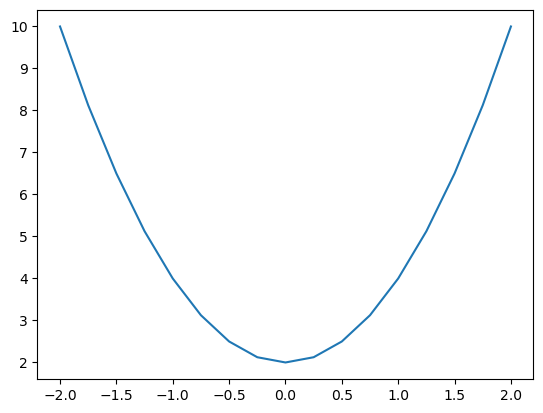

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (2 * x**2 + 2)

x = np.arange(-2, 2.1,0.25) # 구간 [-2, 2]를 0.25 간격으로 x 정의
print(x)

y = f(x)
print(y) # f(x) 결과를 y에 대입

plt.plot(x,y)

In [5]:
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

### 1.4 미분 & 수치 미분 구현

In [11]:
def fdiff(f):
    def diff(x):
        h = 1e-6
        return ((f(x+h)-f(x-h)) / (2*h))
    return diff

diff = fdiff(f)
y_dash = diff(x)

print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


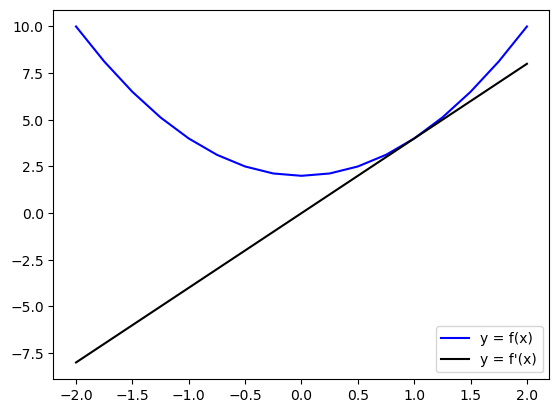

In [12]:
plt.plot(x,y, label = r'y = f(x)', c = 'b')
plt.plot(x,y_dash, label=r"y = f'(x)", c = 'k')
plt.legend()
plt.show()

[0.11920292 0.1480472  0.18242552 0.22270014 0.26894142 0.3208213
 0.37754067 0.4378235  0.5        0.5621765  0.62245933 0.6791787
 0.73105858 0.77729986 0.81757448 0.8519528  0.88079708]


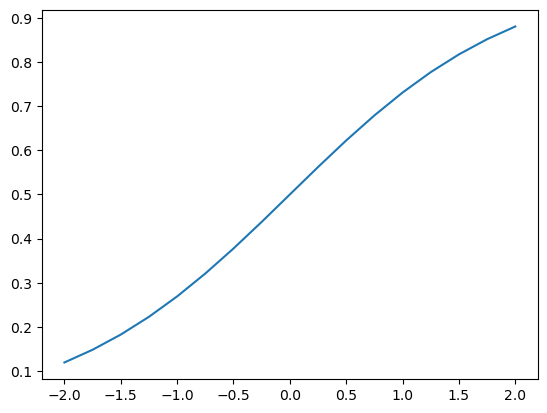

In [13]:
# Sigmoid
def g(x):
    return 1/ (1+np.exp(-x))

y = g(x)
print(y)

plt.plot(x,y)
plt.show()

In [15]:
diff = fdiff(g)
y_dash = diff(x)
print(y_dash)

[0.10499359 0.12612923 0.14914645 0.17310479 0.19661193 0.21789499
 0.23500371 0.24613408 0.25       0.24613408 0.23500371 0.21789499
 0.19661193 0.17310479 0.14914645 0.12612923 0.10499359]


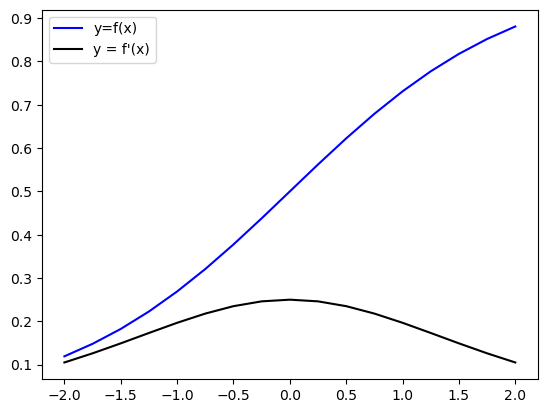

In [17]:
plt.plot(x,y,label=r'y=f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f'(x)", c = 'k')
plt.legend()
plt.show()

### 1.5 Custom Class Definition

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def draw(self):
        plt.plot(self.x, self.y, marker ='o', markersize=10, c='k')

In [21]:
p1 = Point(2,3)
p2 = Point(-1,-2)

In [22]:
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


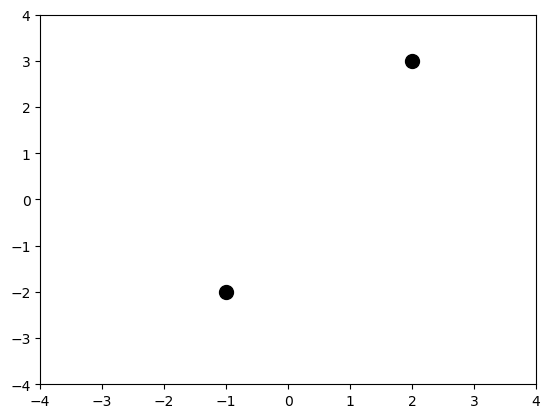

In [23]:
p1.draw()
p2.draw()

plt.xlim(-4,4)
plt.ylim(-4,4)

plt.show()

In [24]:
class Circle1(Point):
    def __init__(self,x,y,r):
        super().__init__(x,y)
        self.r = r

In [25]:
c1_1 = Circle1(1,0,2)
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


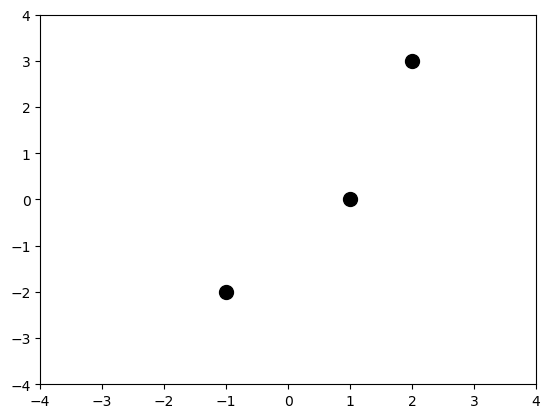

In [26]:
ax = plt.subplot()
p1.draw()
p2.draw()

c1_1.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [35]:
class Circle2(Point):
    def __init__(self,x,y,r):
        super().__init__(x,y)
        self.r = r
        
    def draw(self):
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [36]:
c2_1 = Circle2(1,0,2)

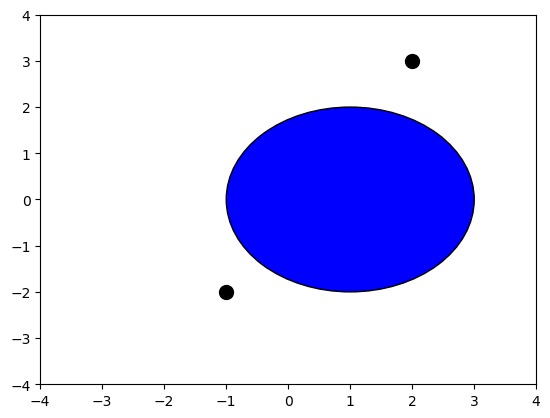

In [37]:
ax = plt.subplot()
p1.draw()
p2.draw()

c2_1.draw()

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()